# Overview

This notebook provides an overview of the available data extracted from the British National Corpus.

# Preamble

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_colwidth', None)


# Data loading and overview

In [3]:
bnc_df = pd.read_csv('../data/copyright/BNC_combined_we_you_indexed.csv',index_col=0)
bnc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14702 entries, 0 to 14701
Data columns (total 37 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Number of hit                           14702 non-null  object 
 1   Textname                                14702 non-null  object 
 2   S-unit number                           14702 non-null  object 
 3   Speaker-ID (if applicable)              5683 non-null   object 
 4   Left context                            14699 non-null  object 
 5   Query item                              14702 non-null  object 
 6   Right context                           14702 non-null  object 
 7   Category_GH                             14681 non-null  object 
 8   Category_AS                             14694 non-null  object 
 9   Category_consolidated                   14702 non-null  object 
 10  comments                                146 non-null    object 

In [4]:
# rename column for consistency with German dataset
bnc_df.rename(columns={'Category_consolidated':'instance'},inplace=True)


Check for na values:

In [5]:
bnc_df.isna().sum()

Number of hit                                 0
Textname                                      0
S-unit number                                 0
Speaker-ID (if applicable)                 9019
Left context                                  3
Query item                                    0
Right context                                 0
Category_GH                                  21
Category_AS                                   8
instance                                      0
comments                                  14556
Pron                                      11111
N                                         11115
Nlemma                                    11118
doubled                                   14682
Ncol                                      14318
Person                                        0
Num                                        7776
Func                                      11124
Genitive                                  14697
Spoken or Written                       

In [6]:
bnc_df[bnc_df['Left context'].isna()]

,Number of hit,Textname,S-unit number,Speaker-ID (if applicable),Left context,Query item,Right context,Category_GH,Category_AS,instance,...,Region where spoken text was captured,Domain (spoken context governed texts),Age,Social Class,First Language,Education,Dialect/Accent,URL,Matchbegin corpus position,Matchend corpus position
5564,1405a,C8E,1896,NaN,NaN,You fucking slags,! You ugly fart-breaths ! Fuck off to hell ! ] he shouted at us .,apc_pl,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=C8E&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=1896&spids=1&interval=11&first=yes&urlTest=yes,23633350,23633352
6430,2259,CHA,1087a,NaN,NaN,You bitch,! You slut ! Bend over !,apc_sg,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=CHA&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=1087&spids=1&interval=11&first=yes&urlTest=yes,34812741,34812742
9903,5723,HTN,1183,NaN,NaN,"You stupid , silly , idiotic baby",! You poor darling boy ! What does that make Garvey ?,apc_sg,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=HTN&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=1183&spids=1&interval=11&first=yes&urlTest=yes,87097606,87097609


The only null values in the three relevant text fields can be safely replaced by empty strings to ensure consistent data types.

Notice that concatenation of the three fields (left context, query item, right context) with addition of spaces will lead to spaces before punctuation between 'Query item' and 'Right context' in the examples above. This is not a major issue, since the data is going to be fed to a tokeniser that would split off the punctuation anyway. For cleanliness we could still remove spaces before punctuation, but note that the base data from the BNC already contains spaces before punctuation. 

In [7]:
# ensure that all three columns are strings
bnc_df[['Left context', 'Query item', 'Right context']] = bnc_df[['Left context', 'Query item', 'Right context']].fillna('').astype(str)
# concatenate the three columns into a single 'Hit' column
bnc_df['Hit'] = bnc_df[['Left context', 'Query item', 'Right context']].agg(' '.join, axis=1)
# optionally remove extraneous spaces before punctuation
#bnc_df['Hit'] = bnc_df['Hit'].str.replace(r'\s+([?.!,;:])', r'\1', regex=True)

In [8]:
bnc_df.head().T

,0,1,2,3,4
Number of hit,1,2,3,4,5
Textname,A00,A03,A08,A08,A08
S-unit number,91,687,442,1200,2160
Speaker-ID (if applicable),NaN,NaN,NaN,NaN,NaN
Left context,Many of our existing volunteers have families and jobs and are often very busy . You do n't have to make a firm commitment but obviously we like you to give,"This background experience is coupled with knowledge of a country 's laws , constitution and judicial process and political and historical background . [ When you 've done research on a country for years , you also get a sense of which groups have vested interests or political agendas , who can be trusted and who has given","Kept in touch with him , waiting for the right occasion to use him . He was quite frank about the whole thing , told",Phenomenal energy still . After cooking supper that was more like a banquet than an ordinary meal he played,But is that not what he wanted ? he typed ( as Harsnet had written ) . Do not most of
Query item,us some idea,us reliable information,us H.,us some medieval things,us search
Right context,of your availability . This is so we can respond effectively to the needs of our clients .,", ] said Smart . Amnesty also has its own checks which ensure that all its major reports are passed through several levels of approvals , often up to the Secretary General himself .","had given him a fiver to turn up , asked Madge if she wanted to go through with it , which of course she did n't . Her father furious .",on the organ and then some Elizabethan things on the clavichord . Left him still playing at midnight and collapsed into bed .,"for excuses most of the time ? Excuses not to do the work we think we might or should do , excuses not to be kind or considerate or whatever it is we feel we should be ?"
Category_GH,no_apc,no_apc,no_apc,no_apc,no_apc
Category_AS,0,0,0,0,0
instance,0,0,0,0,0


The BNC uses square brackets as markers of direct speech or emphasis. For my use case, I assume that raw texts would be more likely to use quotation marks in such contexts, so I am converting the brackets to quotation marks. There are instances of transcriptions in the text marked as [unclear] - I convert those to <unclear> for annotation that's more in line with BERT practices.

In [9]:
import re

def normalize_brackets(text):
    # Case 1: explicit [ unclear ] → replace with <unclear>
    text = re.sub(r'\[\s*unclear\s*\]', '<unclear>', text, flags=re.IGNORECASE)
    
    # Case 2: other bracketed spans → convert [ ... ] → " ... "
    text = re.sub(r'\[\s*([^]]+?)\s*\]', r'"\1"', text)
    
    return text

# apply bracket normalisation and reduce potentially remaining double spaces
bnc_df['Hit'] = bnc_df['Hit'].apply(normalize_brackets).apply(lambda line:' '.join(line.split()))

#bnc_df['Hit'] = bnc_df['Hit'].str.replace(r'\[|\]', '\"', regex=True).str.strip()

In [10]:
bnc_df.head()

,Number of hit,Textname,S-unit number,Speaker-ID (if applicable),Left context,Query item,Right context,Category_GH,Category_AS,instance,...,Domain (spoken context governed texts),Age,Social Class,First Language,Education,Dialect/Accent,URL,Matchbegin corpus position,Matchend corpus position,Hit
0,1,A00,91,NaN,Many of our existing volunteers have families and jobs and are often very busy . You do n't have to make a firm commitment but obviously we like you to give,us some idea,of your availability . This is so we can respond effectively to the needs of our clients .,no_apc,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=A00&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=91&spids=1&interval=11&first=yes&urlTest=yes,877,879,Many of our existing volunteers have families and jobs and are often very busy . You do n't have to make a firm commitment but obviously we like you to give us some idea of your availability . This is so we can respond effectively to the needs of our clients .
1,2,A03,687,NaN,"This background experience is coupled with knowledge of a country 's laws , constitution and judicial process and political and historical background . [ When you 've done research on a country for years , you also get a sense of which groups have vested interests or political agendas , who can be trusted and who has given",us reliable information,", ] said Smart . Amnesty also has its own checks which ensure that all its major reports are passed through several levels of approvals , often up to the Secretary General himself .",no_apc,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=A03&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=687&spids=1&interval=11&first=yes&urlTest=yes,33745,33747,"This background experience is coupled with knowledge of a country 's laws , constitution and judicial process and political and historical background . ""When you 've done research on a country for years , you also get a sense of which groups have vested interests or political agendas , who can be trusted and who has given us reliable information ,"" said Smart . Amnesty also has its own checks which ensure that all its major reports are passed through several levels of approvals , often up to the Secretary General himself ."
2,3,A08,442,NaN,"Kept in touch with him , waiting for the right occasion to use him . He was quite frank about the whole thing , told",us H.,"had given him a fiver to turn up , asked Madge if she wanted to go through with it , which of course she did n't . Her father furious .",no_apc,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=A08&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=442&spids=1&interval=11&first=yes&urlTest=yes,227165,227166,"Kept in touch with him , waiting for the right occasion to use him . He was quite frank about the whole thing , told us H. had given him a fiver to turn up , asked Madge if she wanted to go through with it , which of course she did n't . Her father furious ."
3,4,A08,1200,NaN,Phenomenal energy still . After cooking supper that was more like a banquet than an ordinary meal he played,us some medieval things,on the organ and then some Elizabethan things on the clavichord . Left him still playing at midnight and collapsed into bed .,no_apc,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=A08&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=1200&spids=1&interval=11&first=yes&urlTest=yes,238841,238844,Phenomenal energy still . After cooking supper that was more like a banquet than an ordinary meal he played us some medieval things on the organ and then some Elizabethan things on the clavichord . Left him still playing at midnight and collapsed into bed .
4,5,A08,2160,NaN,But is that not what he wanted ? he typed ( as Harsnet had written ) . Do not most of,us search,"for excuses 

Reduce `instance` to binary 0 and 1 values to reduce complexity.

In [11]:
bnc_df.instance.value_counts()

instance
0       9438
1       3508
6       1695
3         25
4         18
2         15
dupl       3
Name: count, dtype: int64

In [12]:
bnc_df.loc[bnc_df.instance == "6"].head(4)

,Number of hit,Textname,S-unit number,Speaker-ID (if applicable),Left context,Query item,Right context,Category_GH,Category_AS,instance,...,Domain (spoken context governed texts),Age,Social Class,First Language,Education,Dialect/Accent,URL,Matchbegin corpus position,Matchend corpus position,Hit
4211,63,A0L,2744,NaN,"[ Have a bloody drink , ] said Jamie . [ The trouble is , Miss Galahad , this flaming green-eyed redhead has got under your skin , she 's growing with",you darling,", like mistletoe on an oak . It 's parasite time !",unclear,6,6,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=A0L&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=2744&spids=1&interval=11&first=yes&urlTest=yes,620453,620454,"""Have a bloody drink ,"" said Jamie . [ The trouble is , Miss Galahad , this flaming green-eyed redhead has got under your skin , she 's growing with you darling , like mistletoe on an oak . It 's parasite time !"
4237,89,A0U,1851,NaN,"One Saturday night he 'd been drinking in front of the telly when he decided to phone Sheila 's place . -- Hullo , is that",you Sheila,"? he asked . -- Aye , came the answer .",noapc,6,6,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=A0U&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=1851&spids=1&interval=11&first=yes&urlTest=yes,872502,872503,"One Saturday night he 'd been drinking in front of the telly when he decided to phone Sheila 's place . -- Hullo , is that you Sheila ? he asked . -- Aye , came the answer ."
4241,93,A0X,330,NaN,Unfortunately the solution published in the July issue of Woodworker is not correct . Thank,you Christopher,Andreae of Bembridge for pointing out my error . To any readers who feel hard done by or annoyed please accept my sincere apologies .,noapc,6,6,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=A0X&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=330&spids=1&interval=11&first=yes&urlTest=yes,927935,927936,Unfortunately the solution published in the July issue of Woodworker is not correct . Thank you Christopher Andreae of Bembridge for pointing out my error . To any readers who feel hard done by or annoyed please accept my sincere apologies .
4314,166,A6E,810,NaN,"Not we won , you notice , but I won . Thank",you Malcolm,. They also really used me over the T-shirts which got them busted -- and persuaded them to change the shop name from Sex to Seditionaries .,noapc,6,6,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=A6E&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=810&spids=1&interval=11&first=yes&urlTest=yes,3183204,3183205,"Not we won , you notice , but I won . Thank you Malcolm . They also really used me over the T-shirts which got them busted -- and persuaded them to change the shop name from Sex to Seditionaries ."


These are cases that more likely involve some kind of locative construction, so no APCs and will be set to 0 here.

In [13]:
bnc_df.loc[bnc_df.instance == '6','instance'] = 0

In [14]:
bnc_df.loc[bnc_df.instance == 'dupl'].head()

,Number of hit,Textname,S-unit number,Speaker-ID (if applicable),Left context,Query item,Right context,Category_GH,Category_AS,instance,...,Domain (spoken context governed texts),Age,Social Class,First Language,Education,Dialect/Accent,URL,Matchbegin corpus position,Matchend corpus position,Hit
3135,3132,J1C,2594,NaN,"I would n't normally say anything like this but having drawn 4 out of our last 5 games then I ca n't even see us qualifying for europe anymore . We need to concentrate on the FA cup , getting a deceent run will give the players some confidence and bring in the money as well as keeping",us fans,happy ( well relatively speaking ) . We 've got ta buy players Deane 's having a mare and Hodge is n't premier league material -- he 's had a fairly long run in the side and has n't produced as much as Rocky did in his few opportunities .,apc,duplication,dupl,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=J1C&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=2594&spids=1&interval=11&first=yes&urlTest=yes,92629047,92629048,"I would n't normally say anything like this but having drawn 4 out of our last 5 games then I ca n't even see us qualifying for europe anymore . We need to concentrate on the FA cup , getting a deceent run will give the players some confidence and bring in the money as well as keeping us fans happy ( well relatively speaking ) . We 've got ta buy players Deane 's having a mare and Hodge is n't premier league material -- he 's had a fairly long run in the side and has n't produced as much as Rocky did in his few opportunities ."
3141,3138,J1E,1328,NaN,go along and buy a ticket from a tout &hellip; or even off another Leeds supporter who has one spare . In the all ticket days you could often wait for the first coach from Leeds to turn up and they would have 20+ tickets for,us poor souls,who could nt get one ! ! Nothing if not resilient Leeds supporters : - ),apc,duplication,dupl,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=J1E&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=1328&spids=1&interval=11&first=yes&urlTest=yes,92669103,92669105,go along and buy a ticket from a tout &hellip; or even off another Leeds supporter who has one spare . In the all ticket days you could often wait for the first coach from Leeds to turn up and they would have 20+ tickets for us poor souls who could nt get one ! ! Nothing if not resilient Leeds supporters : - )
3452,3449,K45,163,NaN,Hollywood heart-throb Tom Berenger guests as the new love in the life of Rebecca ( by Kirstie Alley ) . This is the night,we British fans,"also learn whether Woody 's ( Woody Harrelson ) political career takes off , and will find out what Norm ( George Wendt ) loves most in the world . Whatever happens it 's time to raise one last glass to Cheers and the end of a decade of vintage comedy .",apc,duplication,dupl,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=K45&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=163&spids=1&interval=11&first=yes&urlTest=yes,100532676,100532678,"Hollywood heart-throb Tom Berenger guests as the new love in the life of Rebecca ( by Kirstie Alley ) . This is the night we British fans also learn whether Woody 's ( Woody Harrelson ) political career takes off , and will find out what Norm ( George Wendt ) loves most in the world . Whatever happens it 's time to raise one last glass to Cheers and the end of a decade of vintage comedy ."


In [15]:
bnc_df.loc[bnc_df.instance == "4"].head()

,Number of hit,Textname,S-unit number,Speaker-ID (if applicable),Left context,Query item,Right context,Category_GH,Category_AS,instance,...,Domain (spoken context governed texts),Age,Social Class,First Language,Education,Dialect/Accent,URL,Matchbegin corpus position,Matchend corpus position,Hit
4329,181,A6Y,938,NaN,"There were a lot of old blokes , and women , even some elderly women .",You ali,stood there together . You knew everybody .,noapc,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=A6Y&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=938&spids=1&interval=11&first=yes&urlTest=yes,3756488,3756489,"There were a lot of old blokes , and women , even some elderly women . You ali stood there together . You knew everybody ."
4650,500,AEA,1686,NaN,The man stood the music carefully on the rack and watched the woman settle on the stool . [ I have very great pleasure in introducing to,you all Herr,Eberhardt and his wife . The Eberhardts have come all the way from Rio ! ],noapc,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=AEA&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=1686&spids=1&interval=11&first=yes&urlTest=yes,8883586,8883588,"The man stood the music carefully on the rack and watched the woman settle on the stool . ""I have very great pleasure in introducing to you all Herr Eberhardt and his wife . The Eberhardts have come all the way from Rio !"""
5267,1113,B3J,2759,NaN,"Billy must have been reading his thoughts . [ Christ , ] he breathed , [",you two look,as though you come straight from Hollywood . ] Julie smiled at him but Nigger ignored him completely as he stuck his hand out to Yanto .,noapc,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=B3J&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=2759&spids=1&interval=11&first=yes&urlTest=yes,19291587,19291589,"Billy must have been reading his thoughts . ""Christ ,"" he breathed , ""you two look as though you come straight from Hollywood ."" Julie smiled at him but Nigger ignored him completely as he stuck his hand out to Yanto ."
5461,1303,BP7,2818,NaN,"[ Now , ] said Caldecott . [ Shall I be mother and pour or d' you want me to disappear while",you two talk,"Jockey Club business . ] [ That 's fine , Charles , ] Nick smiled .",noapc,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=BP7&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=2818&spids=1&interval=11&first=yes&urlTest=yes,22877625,22877627,"""Now ,"" said Caldecott . ""Shall I be mother and pour or d' you want me to disappear while you two talk Jockey Club business ."" ""That 's fine , Charles ,"" Nick smiled ."
7174,3003,F7U,759,PS1MR,"And it ignites all on it 's own ! [unclear] a terrible state ! Also any of you go to university to do [unclear] , course",you all will,to some extent cos you love chemistry so much ! It sits here .,other,0,4,...,Educational/Informative,45-59,Unknown,NaN,Unknown,No accent recorded,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=F7U&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=759&spids=1&interval=11&first=yes&urlTest=yes,50567701,50567703,"And it ignites all on it 's own ! <unclear> a terrible state ! Also any of you go to university to do <unclear> , course you all will to some extent cos you love chemistry so much ! It sits here ."


In [16]:
bnc_df.loc[bnc_df['Query item'] == "You ali"].head()

,Number of hit,Textname,S-unit number,Speaker-ID (if applicable),Left context,Query item,Right context,Category_GH,Category_AS,instance,...,Domain (spoken context governed texts),Age,Social Class,First Language,Education,Dialect/Accent,URL,Matchbegin corpus position,Matchend corpus position,Hit
4329,181,A6Y,938,NaN,"There were a lot of old blokes , and women , even some elderly women .",You ali,stood there together . You knew everybody .,noapc,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=A6Y&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=938&spids=1&interval=11&first=yes&urlTest=yes,3756488,3756489,"There were a lot of old blokes , and women , even some elderly women . You ali stood there together . You knew everybody ."


Remove duplicate lines with "dupl" to ensure uniform dtype of `instance` and remove clear duplicates. Delay removing values 3 (deliberate duplicates due to coordination resolution) and 4 until treatment of instance == 2 is clarified and I save a copy of the intermediate enhanced dataset.

In [17]:
bnc_df = bnc_df[~bnc_df.instance.isin(["dupl"])]

Check the instances with value 2 (15 rows output total, only showing first 3 to avoid copyright issues).

In [18]:
bnc_df.loc[bnc_df.instance == "2"].head(3)

,Number of hit,Textname,S-unit number,Speaker-ID (if applicable),Left context,Query item,Right context,Category_GH,Category_AS,instance,...,Domain (spoken context governed texts),Age,Social Class,First Language,Education,Dialect/Accent,URL,Matchbegin corpus position,Matchend corpus position,Hit
1777,1775,FA9,1879,NaN,I do n't think they 're wanted . All of them things are all right in peacetime -- we like to have ceremonies and royal robes -- but now it 's up to,us ali,-- not Kings and Queens . ] Another man commented that [ Kings and Queens do n't make much difference when it comes to wars and so on .,no_apc,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=FA9&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=1879&spids=1&interval=11&first=yes&urlTest=yes,52030942,52030943,I do n't think they 're wanted . All of them things are all right in peacetime -- we like to have ceremonies and royal robes -- but now it 's up to us ali -- not Kings and Queens . ] Another man commented that [ Kings and Queens do n't make much difference when it comes to wars and so on .
1975,1973,FTY,586,NaN,"Initially what we should all do is go back and look at those draft guidelines for the registration of nursing homes and be prepared to pull them to pieces , not so much for what they are saying but for what they are not saying and ought to be saying in order to be relevant . The chances are they are not going to be changed again in a hurry and to saddle ourselves with something that is going to allow the development and perpetuation of something which most of",us hero,"would call bad and unacceptable practice in care of the elderly with dementia , would be a totally retrograde step . Written by Linda Headland on the basis of work carried out by the Scottish Action on Dementia Working Group on Private Care .",unclear,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=FTY&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=586&spids=1&interval=11&first=yes&urlTest=yes,59538510,59538511,"Initially what we should all do is go back and look at those draft guidelines for the registration of nursing homes and be prepared to pull them to pieces , not so much for what they are saying but for what they are not saying and ought to be saying in order to be relevant . The chances are they are not going to be changed again in a hurry and to saddle ourselves with something that is going to allow the development and perpetuation of something which most of us hero would call bad and unacceptable practice in care of the elderly with dementia , would be a totally retrograde step . Written by Linda Headland on the basis of work carried out by the Scottish Action on Dementia Working Group on Private Care ."
1984,1982,FU4,1424,NaN,"BELVILLE : Your sex is the devil . How strangely can you discompose , calm and turn",us poor weathercocks,of men . Your last kind blessing to my Pamela has quite melted me .,apc,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=FU4&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=1424&spids=1&interval=11&first=yes&urlTest=yes,59722364,59722366,"BELVILLE : Your sex is the devil . How strangely can you discompose , calm and turn us poor weathercocks of men . Your last kind blessing to my Pamela has quite melted me ."


For now manually pick some lines to keep and to remove.

In [19]:
bnc_df = bnc_df.loc[~bnc_df.index.isin([1777, 1975, 1984, 3138, 8418, 10468])]


In [20]:
# set to false
bnc_df.loc[[2865,13526,13610,13616,13813],'instance'] = 0

In [21]:
# set to true
bnc_df.loc[[5159,12301,12310,12699],'instance'] = 1

In [22]:
bnc_df.instance.value_counts()

instance
0    9438
1    3508
0    1700
3      25
4      18
1       4
Name: count, dtype: int64

In [23]:
bnc_df.instance = bnc_df.instance.astype(int)

In [24]:
bnc_df.instance.value_counts()

instance
0    11138
1     3512
3       25
4       18
Name: count, dtype: int64

There is a small number of cases where `Pron` or `N` are empty while `instance` is 1:

In [25]:
bnc_df.loc[bnc_df['instance'] ==1,['Pron','N']].isna().sum()

Pron    3
N       6
dtype: int64

In [26]:
bnc_df.loc[(bnc_df['instance'] ==1) & (bnc_df['Pron'].isna() | bnc_df['N'].isna()),['Hit','Query item']]

,Hit,Query item
9987,"""Crawford . You filthy stinking --"" Several Repo Men took the opportunity to club him to his knees . ""Told you you were in for a nasty surprise ,"" Rex smirked awfully .",You filthy stinking
12301,Okay ? I 'll do it for you babes . You got it switched off .,you babes
12310,"Do n't worry . I 'll try and get the best for you babes . Well , we 're having a nice proper dinner .",you babes
12699,"<unclear> Oh I 'm not buying that , cos it 's not strong enough for me . Oh you man . It depends if you get the strong stuff you dipstick .",you man
12824,It 's cos it 's new and he 's grinding it . You daft scrounging <unclear> Oh sit down <unclear>,You daft scrounging
13420,Urgh ! She said you dirty animal fucking git ! She got me she had to kiss me on the arse she fucking she had to be there thirty seconds to get the points and I farted at about ten seconds,you dirty animal


Assign the missing values for `Pron` and `N`:

In [27]:
bnc_df.loc[9987,['Pron','N']] = ['you', '--']
bnc_df.loc[12301,['Pron','N']] = ['you', 'babes']
bnc_df.loc[12310,['Pron','N']] = ['you', 'babes']
bnc_df.loc[12699,['Pron','N']] = ['you', 'man']
bnc_df.loc[12824,['Pron','N']] = ['you', '<unclear>']
bnc_df.loc[13420,['Pron','N']] = ['you', 'animal']

In [28]:
bnc_df['APC_v1'] = bnc_df['Query item']
bnc_df.loc[bnc_df['instance'] == 1,'APC_v2'] = bnc_df.loc[bnc_df['instance'] == 1,['Pron','N']].astype(str).agg(' '.join, axis=1)

Save full enhanced version of dataset:

In [29]:
bnc_df.to_csv('../data/copyright/BNC_combined_we_you_indexed_plusHit.csv')


# Basic distribution over person and number



In [30]:
persnumcount = bnc_df.groupby(['Person','Num','instance'])['Number of hit'].size().reset_index(name='Count')
print(persnumcount)

    Person    Num  instance  Count
0        1     pl         0   3339
1        1     pl         1    798
2        1     pl         3      5
3        2     pl         0     17
4        2     pl         1   1244
5        2     pl         3     15
6        2     pl         4     17
7        2     sg         0     14
8        2     sg         1   1460
9        2     sg         3      5
10       2  sg/pl         1      4


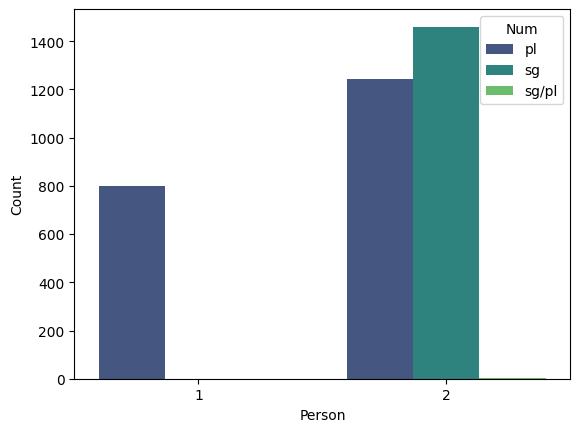

In [31]:
sns.barplot(persnumcount.loc[persnumcount.instance==1],x='Person',y='Count',hue='Num',errorbar=None,estimator='sum',palette='viridis');

There is a considerably higher number of 2nd person APCs than 1st person APCs in the BNC, even when just comparing plural number.

# Create reduced dataset for BERT training

Manually reviewed and corrected the BNC data. Loading new for creation of reduced dataset

In [32]:
bnc_manual = pd.read_csv('../data/copyright/BNC_APC_full.csv',index_col=0)

In [33]:
bnc_manual.head(3)

,Number of hit,Textname,S-unit number,Speaker-ID (if applicable),Left context,Query item,Right context,APC_v1,APC_v2,APC_manual,...,Domain (spoken context governed texts),Age,Social Class,First Language,Education,Dialect/Accent,URL,Matchbegin corpus position,Matchend corpus position,Hit
0,1,A00,91,NaN,Many of our existing volunteers have families and jobs and are often very busy . You do n't have to make a firm commitment but obviously we like you to give,us some idea,of your availability . This is so we can respond effectively to the needs of our clients .,us some idea,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=A00&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=91&spids=1&interval=11&first=yes&urlTest=yes,877,879,Many of our existing volunteers have families and jobs and are often very busy . You do n't have to make a firm commitment but obviously we like you to give us some idea of your availability . This is so we can respond effectively to the needs of our clients .
1,2,A03,687,NaN,"This background experience is coupled with knowledge of a country 's laws , constitution and judicial process and political and historical background . [ When you 've done research on a country for years , you also get a sense of which groups have vested interests or political agendas , who can be trusted and who has given",us reliable information,", ] said Smart . Amnesty also has its own checks which ensure that all its major reports are passed through several levels of approvals , often up to the Secretary General himself .",us reliable information,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=A03&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=687&spids=1&interval=11&first=yes&urlTest=yes,33745,33747,"This background experience is coupled with knowledge of a country 's laws , constitution and judicial process and political and historical background . ""When you 've done research on a country for years , you also get a sense of which groups have vested interests or political agendas , who can be trusted and who has given us reliable information ,"" said Smart . Amnesty also has its own checks which ensure that all its major reports are passed through several levels of approvals , often up to the Secretary General himself ."
2,3,A08,442,NaN,"Kept in touch with him , waiting for the right occasion to use him . He was quite frank about the whole thing , told",us H.,"had given him a fiver to turn up , asked Madge if she wanted to go through with it , which of course she did n't . Her father furious .",us H.,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://bncweb.lancs.ac.uk/cgi-binbncXML/context.pl?text=A08&qname=nosol&refnum=0&theData=0&len=0&showTheTag=0&color=0&begin=442&spids=1&interval=11&first=yes&urlTest=yes,227165,227166,"Kept in touch with him , waiting for the right occasion to use him . He was quite frank about the whole thing , told us H. had given him a fiver to turn up , asked Madge if she wanted to go through with it , which of course she did n't . Her father furious ."


Now finally remove duplicate lines with values 3 (deliberate duplicates due to coordination resolution), 4 and "dupl":

In [34]:
bnc_manual = bnc_manual[~bnc_manual.instance.isin([3,4])]

Save reduced version of dataset for BERT training, including empty `ContextBefore` and `ContextAfter` fields for consistency with workflow.

In [35]:
bnc_manual['ContextBefore'] = ""
bnc_manual['ContextAfter'] = ""
bnc_manual['APC'] = bnc_manual['APC_manual']

In [36]:
bnc_manual[['ContextBefore','Hit','ContextAfter','instance','APC']].to_csv('../data/copyright/BNC_combined_we_you_redux.csv')